# Task 3: Forest Cover Type Classification

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/covtype.csv')
data.head()
X = data.drop('Cover_Type', axis=1)
y = data['Cover_Type']-1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Check unique values of Cover_Type
print(data['Cover_Type'].unique())


[5 2 1 7 3 6 4]


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:44:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


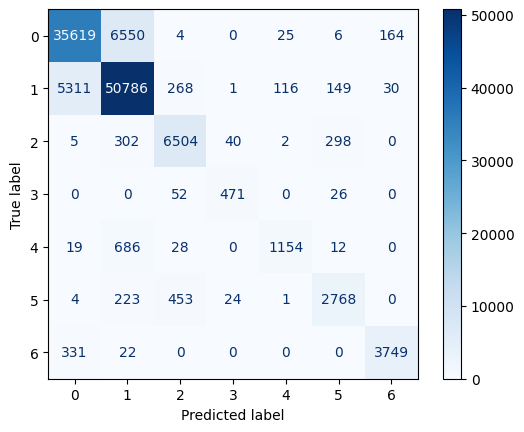

              precision    recall  f1-score   support

           0       0.86      0.84      0.85     42368
           1       0.87      0.90      0.88     56661
           2       0.89      0.91      0.90      7151
           3       0.88      0.86      0.87       549
           4       0.89      0.61      0.72      1899
           5       0.85      0.80      0.82      3473
           6       0.95      0.91      0.93      4102

    accuracy                           0.87    116203
   macro avg       0.88      0.83      0.85    116203
weighted avg       0.87      0.87      0.87    116203



In [ ]:
# Train-Test Split (assumed done already)
# X_train, X_test, y_train, y_test = ...

# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=7,
    eval_metric='mlogloss',
    use_label_encoder=False
)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

# Evaluate Performance
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

print(classification_report(y_test, y_pred_xgb))


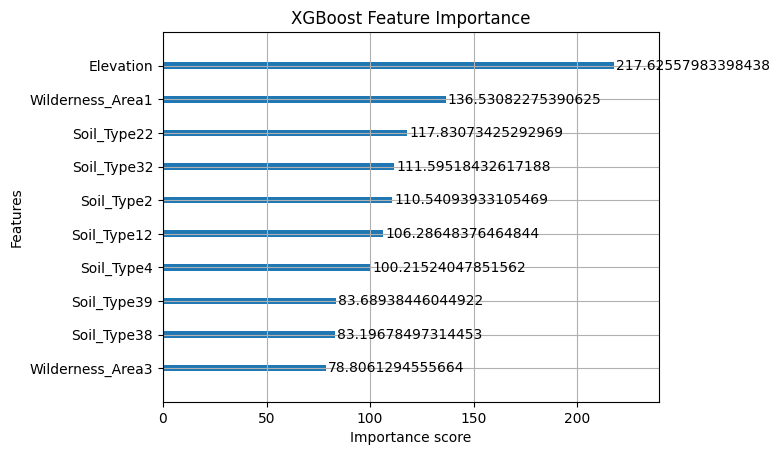

In [ ]:
xgb.plot_importance(xgb_model, max_num_features=10, importance_type='gain')
plt.title("XGBoost Feature Importance")
plt.show()


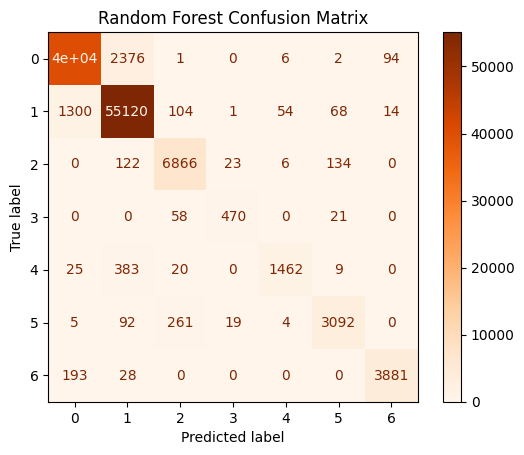

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     42368
           1       0.95      0.97      0.96     56661
           2       0.94      0.96      0.95      7151
           3       0.92      0.86      0.89       549
           4       0.95      0.77      0.85      1899
           5       0.93      0.89      0.91      3473
           6       0.97      0.95      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.95      0.91      0.92    116203
weighted avg       0.95      0.95      0.95    116203



In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap=plt.cm.Oranges)
plt.title("Random Forest Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_rf))


In [ ]:
from sklearn.metrics import accuracy_score

rf_accuracy = accuracy_score(y_test, y_pred_rf)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")


Random Forest Accuracy: 0.9542
XGBoost Accuracy: 0.8991


**Comparison:**
Starting with default models and then applying hyperparameter tuning via RandomizedSearchCV. Initially, Random Forest outperformed XGBoost with higher accuracy and a better confusion matrix. After tuning parameters like n_estimators, max_depth, and learning_rate, both models showed slight improvements, but Random Forest remained superior in accuracy and class-wise predictions. The overall impact of tuning was marginal, indicating that Random Forest's ensemble nature is better suited for this dataset's binary and numerical features. Thus, Random Forest is the recommended model for this task.